In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

## Set de datos obtenido en el minsal (datos abiertos)
Analizamos los datos, sus columnas y con que datos trabajaremos

In [2]:
df = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_1990_2021_CIFRAS_OFICIALES (1)/DEFUNCIONES_FUENTE_DEIS_1990_2021_CIFRAS_OFICIALES.csv", encoding = 'latin-1', sep=';', low_memory=False)


In [3]:
df.columns

Index(['AÑO', 'FECHA_DEF', 'SEXO_NOMBRE', 'EDAD_TIPO', 'EDAD_CANT',
       'COD_COMUNA', 'COMUNA', 'NOMBRE_REGION', 'DIAG1', 'CAPITULO_DIAG1',
       'GLOSA_CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1', 'GLOSA_GRUPO_DIAG1',
       'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1',
       'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'DIAG2',
       'CAPITULO_DIAG2', 'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2',
       'GLOSA_GRUPO_DIAG2', 'CODIGO_CATEGORIA_DIAG2', 'GLOSA_CATEGORIA_DIAG2',
       'CODIGO_SUBCATEGORIA_DIAG2', 'GLOSA_SUBCATEGORIA_DIAG2',
       'LUGAR_DEFUNCION'],
      dtype='object')

In [4]:
df2014 = df[df["AÑO"] == 2014]
df2014.shape

(101960, 27)

In [5]:
df["DIAG1"].unique()

array(['8629', '9941', '8540', ..., 'T399', 'S054', 'C138'], dtype=object)

In [6]:
df["CAPITULO_DIAG1"].unique()

array([nan, 'S00-T98', 'C00-D48', 'A00-B99', 'E00-E90', 'D50-D89',
       'R00-R99', 'I00-I99', 'K00-K93', 'N00-N99', 'F00-F99', 'J00-J99',
       'G00-G99', 'P00-P96', 'Q00-Q99', 'H00-H59', 'H60-H95', 'M00-M99',
       'O00-O99', 'L00-L99', 'U00-U99'], dtype=object)

In [7]:
df["GLOSA_CAPITULO_DIAG1"].unique()

array([nan,
       'Traumatismos, envenenamientos y algunas otras consecuencias de causas externas',
       'Tumores [Neoplasias]',
       'Ciertas enfermedades infecciosas y parasitarias',
       'Enfermedades endocrinas, nutricionales y metabólicas',
       'Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad ',
       'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
       'Enfermedades del sistema circulatorio ',
       'Enfermedades del sistema digestivo',
       'Enfermedades del sistema genitourinario',
       'Trastornos mentales y del comportamiento',
       'Enfermedades del sistema respiratorio ',
       'Enfermedades del sistema nervioso central',
       'Ciertas afecciones originadas en el período perinatal',
       'Malformaciones congénitas, deformidades y anomalías cromosómicas',
       'Enfermedades del ojo y sus anexos ',
       'Enfermedades del oíd

In [8]:
df["GLOSA_GRUPO_DIAG1"].unique()

array([nan, ' Otros efectos y los no especificados de causas externas',
       'Traumatismos del tórax',
       'Traumatismos que afectan múltiples regiones del cuerpo',
       'Traumatismos de la cabeza', 'Quemaduras y corrosiones',
       'Efectos de cuerpos extraños que penetran por orificios naturales',
       'Traumatismos del abdomen, de la región lumbosacra, de la columna lumbar y de la pelvis',
       'Traumatismos del cuello',
       'Traumatismos de parte no especificada del tronco, miembro o región del cuerpo',
       'Traumatismos de la rodilla y de la pierna',
       'Complicaciones de la atención médica y quirúrgica, no clasificadas en otra parte',
       'Efectos tóxicos de sustancias de procedencia principalmente no medicinal',
       'Envenenamiento por drogas, medicamentos y sustancias biológicas',
       'Melanoma y otros tumores malignos de la piel',
       'Enfermedades debidas a protozoarios',
       'Traumatismos de la cadera y del muslo',
       'Traumatismos de

In [9]:
df["CAPITULO_DIAG2"].unique()

array([nan, 'V01-Y98'], dtype=object)

In [10]:
df["GLOSA_CAPITULO_DIAG2"].unique()

array([nan, 'Causas externas de morbilidad y de mortalidad'], dtype=object)

In [11]:
df["GLOSA_GRUPO_DIAG2"].unique()

array([nan, 'Otros accidentes que obstruyen la respración',
       'Otros accidentes de transporte terrestre',
       'Exposición accidental a otros factores y a los no especificados',
       'Agresiones', 'Ahogamiento y sumersión accidentales',
       'Peatón lesionado en accidente de transporte',
       'Lesiones autoinfligidas intencionalmente ',
       'Ocupante de camioneta o furgoneta  lesionado en accidente de transporte',
       'Exposición a fuerzas mecánicas inanimadas',
       'Eventos de intención no determinada',
       'Exposición al humo, fuego y llamas',
       'Exposición a fuerzas de la naturaleza',
       'Exposición a la corriente eléctrica, radiación y temperatura, y presión del aire ambientales extremas',
       'Ocupante de autobús   lesionado en accidente de transporte',
       'Exposición a fuerzas mecánicas animadas',
       'Ocupante de automovil  lesionado en accidente de transporte',
       'Ocupante de vehículo de transporte pesado  lesionado en accidente 

## Se realiza la limpieza de las columnas que ocuparemos

In [12]:
# Filtrar las columnas que te interesan
columnas_interes = ['AÑO', 'FECHA_DEF', 'SEXO_NOMBRE', 'EDAD_TIPO', 'EDAD_CANT', 
                    'COD_COMUNA', 'COMUNA', 'NOMBRE_REGION', 
                    'CAPITULO_DIAG1', 'GLOSA_CAPITULO_DIAG1']

# Filtrar las filas donde el año esté entre 2014 y 2021
df_filtrado = df[(df['AÑO'] >= 2014) & (df['AÑO'] <= 2021)][columnas_interes]

# Guardar el nuevo dataframe filtrado en un archivo CSV
df_filtrado.to_csv('datos_filtrados_2014_2021.csv', index=False)

In [13]:
df_filtrado.columns

Index(['AÑO', 'FECHA_DEF', 'SEXO_NOMBRE', 'EDAD_TIPO', 'EDAD_CANT',
       'COD_COMUNA', 'COMUNA', 'NOMBRE_REGION', 'CAPITULO_DIAG1',
       'GLOSA_CAPITULO_DIAG1'],
      dtype='object')

In [14]:
df.columns

Index(['AÑO', 'FECHA_DEF', 'SEXO_NOMBRE', 'EDAD_TIPO', 'EDAD_CANT',
       'COD_COMUNA', 'COMUNA', 'NOMBRE_REGION', 'DIAG1', 'CAPITULO_DIAG1',
       'GLOSA_CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1', 'GLOSA_GRUPO_DIAG1',
       'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1',
       'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'DIAG2',
       'CAPITULO_DIAG2', 'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2',
       'GLOSA_GRUPO_DIAG2', 'CODIGO_CATEGORIA_DIAG2', 'GLOSA_CATEGORIA_DIAG2',
       'CODIGO_SUBCATEGORIA_DIAG2', 'GLOSA_SUBCATEGORIA_DIAG2',
       'LUGAR_DEFUNCION'],
      dtype='object')

In [15]:
df_filtrado.head()

,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1
262,2015,2015-01-11,Mujer,2.0,4,13127,Recoleta,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
579,2016,2016-01-31,Hombre,1.0,20,8203,Cañete,Del Bíobío,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
646,2019,2019-08-08,Hombre,1.0,18,13303,Tiltil,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
647,2015,2015-02-17,Hombre,1.0,19,13119,Maipú,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
807,2015,2015-01-03,Hombre,1.0,18,13115,Lo Barnechea,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."


In [16]:
df_filtrado.tail()

,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1
2923251,2021,2021-11-07,Mujer,1.0,93,13115,Lo Barnechea,Metropolitana de Santiago,E00-E90,"Enfermedades endocrinas, nutricionales y metab..."
2923252,2021,2021-10-09,Mujer,1.0,88,5402,Cabildo,De Valparaíso,A00-B99,Ciertas enfermedades infecciosas y parasitarias
2923253,2021,2021-11-17,Hombre,1.0,80,13104,Conchalí,Metropolitana de Santiago,I00-I99,Enfermedades del sistema circulatorio
2923254,2021,2021-02-03,Hombre,1.0,80,13122,Peñalolén,Metropolitana de Santiago,I00-I99,Enfermedades del sistema circulatorio
2923255,2021,2021-01-26,Mujer,1.0,87,13127,Recoleta,Metropolitana de Santiago,C00-D48,Tumores [Neoplasias]


In [17]:
# Filtrar las filas donde la columna 'AÑO' esté entre 2014 y 2021
filtrado_2014_2021 = df_filtrado[(df_filtrado['AÑO'] >= 2014) & (df['AÑO'] <= 2021)]

# Contar las filas por cada año
conteo_por_año = filtrado_2014_2021.groupby('AÑO').size()

# Mostrar los resultados
for año, cantidad in conteo_por_año.items():
    print(f"{año} tuvo: {cantidad} muertos")



2014 tuvo: 101960 muertos
2015 tuvo: 103327 muertos
2016 tuvo: 104026 muertos
2017 tuvo: 106388 muertos
2018 tuvo: 106796 muertos
2019 tuvo: 109658 muertos
2020 tuvo: 126169 muertos
2021 tuvo: 137629 muertos


C:\Users\diego\AppData\Local\Temp\ipykernel_6564\4062747532.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtrado_2014_2021 = df_filtrado[(df_filtrado['AÑO'] >= 2014) & (df['AÑO'] <= 2021)]


In [18]:

# Agrupar por 'AÑO' y 'CAPITULO_DIAG1', y contar las ocurrencias
conteo_por_año_y_capitulo = df_filtrado.groupby(['AÑO', 'CAPITULO_DIAG1']).size().reset_index(name='count')

# Mostrar los resultados
for año in sorted(conteo_por_año_y_capitulo['AÑO'].unique()):
    print(f"\n{año}:")
    datos_año = conteo_por_año_y_capitulo[conteo_por_año_y_capitulo['AÑO'] == año]
    for _, row in datos_año.iterrows():
        print(f"{row['count']} muertos por {row['CAPITULO_DIAG1']}")



2014:
2599 muertos por A00-B99
26042 muertos por C00-D48
500 muertos por D50-D89
5188 muertos por E00-E90
1836 muertos por F00-F99
3584 muertos por G00-G99
4 muertos por H00-H59
1 muertos por H60-H95
28064 muertos por I00-I99
10448 muertos por J00-J99
7469 muertos por K00-K93
332 muertos por L00-L99
570 muertos por M00-M99
3073 muertos por N00-N99
56 muertos por O00-O99
848 muertos por P00-P96
982 muertos por Q00-Q99
2618 muertos por R00-R99
7746 muertos por S00-T98

2015:
2573 muertos por A00-B99
26866 muertos por C00-D48
489 muertos por D50-D89
5858 muertos por E00-E90
1662 muertos por F00-F99
3795 muertos por G00-G99
8 muertos por H00-H59
4 muertos por H60-H95
28321 muertos por I00-I99
9934 muertos por J00-J99
7666 muertos por K00-K93
456 muertos por L00-L99
584 muertos por M00-M99
3125 muertos por N00-N99
56 muertos por O00-O99
809 muertos por P00-P96
928 muertos por Q00-Q99
2324 muertos por R00-R99
7869 muertos por S00-T98

2016:
2283 muertos por A00-B99
27183 muertos por C00-D48

In [19]:
# Crear el diccionario que mapea CAPITULO_DIAG1 a GLOSA_CAPITULO_DIAG1
capitulo_a_glosa = {
    'S00-T98': 'Traumatismos, envenenamientos y algunas otras consecuencias de causas externas',
    'C00-D48': 'Tumores [Neoplasias]',
    'A00-B99': 'Ciertas enfermedades infecciosas y parasitarias',
    'E00-E90': 'Enfermedades endocrinas, nutricionales y metabólicas',
    'D50-D89': 'Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad',
    'R00-R99': 'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
    'I00-I99': 'Enfermedades del sistema circulatorio',
    'K00-K93': 'Enfermedades del sistema digestivo',
    'N00-N99': 'Enfermedades del sistema genitourinario',
    'F00-F99': 'Trastornos mentales y del comportamiento',
    'J00-J99': 'Enfermedades del sistema respiratorio',
    'G00-G99': 'Enfermedades del sistema nervioso central',
    'P00-P96': 'Ciertas afecciones originadas en el período perinatal',
    'Q00-Q99': 'Malformaciones congénitas, deformidades y anomalías cromosómicas',
    'H00-H59': 'Enfermedades del ojo y sus anexos',
    'H60-H95': 'Enfermedades del oído y de la apófisis mastoides',
    'M00-M99': 'Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    'O00-O99': 'Embarazo, parto y puerperio',
    'L00-L99': 'Enfermedades de la piel y del tejido subcutáneo',
    'U00-U99': 'Códigos para propósitos especiales'
}


# Agrupar por 'AÑO' y 'CAPITULO_DIAG1', y contar las ocurrencias
conteo_por_año_y_capitulo = df_filtrado.groupby(['AÑO', 'CAPITULO_DIAG1']).size().reset_index(name='count')

# Agrupar por 'AÑO' para obtener el total de muertos por año
totales_por_año = conteo_por_año_y_capitulo.groupby('AÑO')['count'].sum()

# Mostrar los resultados con las glosas en lugar de los códigos
for año in sorted(conteo_por_año_y_capitulo['AÑO'].unique()):
    print(f"\n{año}:")
    datos_año = conteo_por_año_y_capitulo[conteo_por_año_y_capitulo['AÑO'] == año]
    for _, row in datos_año.iterrows():
        glosa = capitulo_a_glosa.get(row['CAPITULO_DIAG1'], row['CAPITULO_DIAG1'])  # Obtener la glosa o el código si no está en el diccionario
        print(f"{row['count']} muertos por {glosa}")
    # Mostrar el total de muertos por año
    print(f"\nTotal de muertos en {año}: {totales_por_año[año]}")



2014:
2599 muertos por Ciertas enfermedades infecciosas y parasitarias
26042 muertos por Tumores [Neoplasias]
500 muertos por Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad
5188 muertos por Enfermedades endocrinas, nutricionales y metabólicas
1836 muertos por Trastornos mentales y del comportamiento
3584 muertos por Enfermedades del sistema nervioso central
4 muertos por Enfermedades del ojo y sus anexos
1 muertos por Enfermedades del oído y de la apófisis mastoides
28064 muertos por Enfermedades del sistema circulatorio
10448 muertos por Enfermedades del sistema respiratorio
7469 muertos por Enfermedades del sistema digestivo
332 muertos por Enfermedades de la piel y del tejido subcutáneo
570 muertos por Enfermedades del sistema osteomuscular y del tejido conjuntivo
3073 muertos por Enfermedades del sistema genitourinario
56 muertos por Embarazo, parto y puerperio
848 muertos por Ciertas afecciones originadas 

In [20]:
# Mostrar los resultados con las glosas, pero solo los 5 capítulos con más muertos por año
for año in sorted(conteo_por_año_y_capitulo['AÑO'].unique()):
    print(f"\n{año}:")
    
    # Obtener los 5 capítulos con mayor cantidad de muertos para el año actual
    datos_año = conteo_por_año_y_capitulo[conteo_por_año_y_capitulo['AÑO'] == año]
    top_5_capitulos = datos_año.nlargest(5, 'count')
    
    for _, row in top_5_capitulos.iterrows():
        glosa = capitulo_a_glosa.get(row['CAPITULO_DIAG1'], row['CAPITULO_DIAG1'])  # Obtener la glosa o el código si no está en el diccionario
        print(f"{row['count']} muertos por {glosa}")
    
    # Mostrar el total de muertos por año
    print(f"\nTotal de muertos en {año}: {totales_por_año[año]}")


2014:
28064 muertos por Enfermedades del sistema circulatorio
26042 muertos por Tumores [Neoplasias]
10448 muertos por Enfermedades del sistema respiratorio
7746 muertos por Traumatismos, envenenamientos y algunas otras consecuencias de causas externas
7469 muertos por Enfermedades del sistema digestivo

Total de muertos en 2014: 101960

2015:
28321 muertos por Enfermedades del sistema circulatorio
26866 muertos por Tumores [Neoplasias]
9934 muertos por Enfermedades del sistema respiratorio
7869 muertos por Traumatismos, envenenamientos y algunas otras consecuencias de causas externas
7666 muertos por Enfermedades del sistema digestivo

Total de muertos en 2015: 103327

2016:
28148 muertos por Enfermedades del sistema circulatorio
27183 muertos por Tumores [Neoplasias]
9847 muertos por Enfermedades del sistema respiratorio
7773 muertos por Traumatismos, envenenamientos y algunas otras consecuencias de causas externas
7697 muertos por Enfermedades del sistema digestivo

Total de muerto

In [21]:
columnas = ['AÑO', 'FECHA_DEF', 'SEXO_NOMBRE', 'EDAD_TIPO', 'EDAD_CANT',
            'COD_COMUNA', 'COMUNA', 'NOMBRE_REGION', 'DIAG1', 'CAPITULO_DIAG1',
            'GLOSA_CAPITULO_DIAG1', 'CODIGO_GRUPO_DIAG1', 'GLOSA_GRUPO_DIAG1',
            'CODIGO_CATEGORIA_DIAG1', 'GLOSA_CATEGORIA_DIAG1', 
            'CODIGO_SUBCATEGORIA_DIAG1', 'GLOSA_SUBCATEGORIA_DIAG1', 'DIAG2',
            'CAPITULO_DIAG2', 'GLOSA_CAPITULO_DIAG2', 'CODIGO_GRUPO_DIAG2',
            'GLOSA_GRUPO_DIAG2', 'CODIGO_CATEGORIA_DIAG2', 
            'GLOSA_CATEGORIA_DIAG2', 'CODIGO_SUBCATEGORIA_DIAG2',
            'GLOSA_SUBCATEGORIA_DIAG2', 'LUGAR_DEFUNCION']

# Lectura del archivo CSV con las columnas definidas
dfnuevo = pd.read_csv("DEFUNCIONES_FUENTE_DEIS_2022_2024_01102024.csv", 
                      encoding='latin-1', 
                      sep=';', 
                      low_memory=False,
                      names=columnas)

# Mostrar las primeras filas para verificar
dfnuevo.head()

,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
0,2024,2024-06-10,Mujer,1,84,9210.0,Traiguén,De La Araucanía,J440,J00-J99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
1,2024,2024-03-07,Hombre,1,60,13119.0,Maipú,Metropolitana de Santiago,G122,G00-G99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
2,2024,2024-04-25,Mujer,1,86,5501.0,Quillota,De Valparaíso,C189,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
3,2024,2024-05-25,Mujer,1,83,16107.0,Quillón,De Ñuble,J841,J00-J99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
4,2024,2024-08-01,Mujer,1,85,7101.0,Talca,Del Maule,C159,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


In [22]:
dfnuevo.head()

,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
0,2024,2024-06-10,Mujer,1,84,9210.0,Traiguén,De La Araucanía,J440,J00-J99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
1,2024,2024-03-07,Hombre,1,60,13119.0,Maipú,Metropolitana de Santiago,G122,G00-G99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
2,2024,2024-04-25,Mujer,1,86,5501.0,Quillota,De Valparaíso,C189,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
3,2024,2024-05-25,Mujer,1,83,16107.0,Quillón,De Ñuble,J841,J00-J99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
4,2024,2024-08-01,Mujer,1,85,7101.0,Talca,Del Maule,C159,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


In [23]:
dfnuevo.tail()

,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,DIAG1,CAPITULO_DIAG1,...,DIAG2,CAPITULO_DIAG2,GLOSA_CAPITULO_DIAG2,CODIGO_GRUPO_DIAG2,GLOSA_GRUPO_DIAG2,CODIGO_CATEGORIA_DIAG2,GLOSA_CATEGORIA_DIAG2,CODIGO_SUBCATEGORIA_DIAG2,GLOSA_SUBCATEGORIA_DIAG2,LUGAR_DEFUNCION
354104,2022,2022-05-03,Mujer,1,51,6107.0,Las Cabras,Del Libertador B. O'Higgins,C509,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
354105,2022,2022-02-13,Mujer,1,51,6107.0,Las Cabras,Del Libertador B. O'Higgins,U071,U00-U99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hospital o Clínica
354106,2022,2022-04-02,Mujer,1,51,6116.0,Requínoa,Del Libertador B. O'Higgins,C20X,C00-D48,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
354107,2022,2022-02-08,Mujer,1,51,6116.0,Requínoa,Del Libertador B. O'Higgins,C56X,C00-D48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación
354108,2022,2022-07-06,Mujer,1,52,6201.0,Pichilemu,Del Libertador B. O'Higgins,G122,G00-G99,...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Casa habitación


In [24]:
# Filtrar las filas donde el año esté entre 2022 a 2023
df_filtrado2 = dfnuevo[(dfnuevo['AÑO'] >= 2022) & (df['AÑO'] <= 2023)][columnas_interes]

# Ordenar por la columna 'AÑO' de manera descendente
df_ordenado = df_filtrado2.sort_values(by='AÑO', ascending=True)

# Guardar el nuevo dataframe filtrado en un archivo CSV
df_ordenado.to_csv('datos_filtrados_2022_2023.csv', index=False)

C:\Users\diego\AppData\Local\Temp\ipykernel_6564\2511167627.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtrado2 = dfnuevo[(dfnuevo['AÑO'] >= 2022) & (df['AÑO'] <= 2023)][columnas_interes]


In [25]:

# Cargar ambos archivos CSV
df_1 = pd.read_csv('datos_filtrados_2014_2021.csv')
df_2 = pd.read_csv('datos_filtrados_2022_2023.csv')

# Concatenar ambos DataFrames
df_concatenado = pd.concat([df_1, df_2])

# Guardar el DataFrame combinado en un nuevo archivo CSV
df_concatenado.to_csv('datos_filtrados_2014_2023.csv', index=False)


## Analisis de datos y estadistica aplicada


In [26]:
data = pd.read_csv("datos_filtrados_2014_2023.csv")
data

,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1
0,2015,2015-01-11,Mujer,2.0,4,13127.0,Recoleta,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
1,2016,2016-01-31,Hombre,1.0,20,8203.0,Cañete,Del Bíobío,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
2,2019,2019-08-08,Hombre,1.0,18,13303.0,Tiltil,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
3,2015,2015-02-17,Hombre,1.0,19,13119.0,Maipú,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
4,2015,2015-01-03,Hombre,1.0,18,13115.0,Lo Barnechea,Metropolitana de Santiago,S00-T98,"Traumatismos, envenenamientos y algunas otras ..."
...,...,...,...,...,...,...,...,...,...,...
1250057,2024,2024-06-23,Hombre,1.0,79,11101.0,Coihaique,De Aisén del Gral. C. Ibáñez del Campo,J00-J99,Enfermedades del sistema respiratorio
1250058,2024,2024-05-17,Mujer,1.0,96,2101.0,Antofagasta,De Antofagasta,G00-G99,Enfermedades del sistema nervioso central
1250059,2024,2024-05-24,Mujer,1.0,80,13121.0,Pedro Aguirre Cerda,Metropolitana de Santiago,I00-I99,Enfermedades del sistema circulatorio
1250060,2024,2024-06-04,Mujer,1.0,92,13501.0,Melipilla,Metropolitana de Santiago,I00-I99,Enfermedades del sistema circulatorio


In [27]:
# Crear el diccionario que mapea CAPITULO_DIAG1 a GLOSA_CAPITULO_DIAG1
capitulo_a_glosa = {
    'S00-T98': 'Traumatismos, envenenamientos y algunas otras consecuencias de causas externas',
    'C00-D48': 'Tumores [Neoplasias]',
    'A00-B99': 'Ciertas enfermedades infecciosas y parasitarias',
    'E00-E90': 'Enfermedades endocrinas, nutricionales y metabólicas',
    'D50-D89': 'Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad',
    'R00-R99': 'Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte',
    'I00-I99': 'Enfermedades del sistema circulatorio',
    'K00-K93': 'Enfermedades del sistema digestivo',
    'N00-N99': 'Enfermedades del sistema genitourinario',
    'F00-F99': 'Trastornos mentales y del comportamiento',
    'J00-J99': 'Enfermedades del sistema respiratorio',
    'G00-G99': 'Enfermedades del sistema nervioso central',
    'P00-P96': 'Ciertas afecciones originadas en el período perinatal',
    'Q00-Q99': 'Malformaciones congénitas, deformidades y anomalías cromosómicas',
    'H00-H59': 'Enfermedades del ojo y sus anexos',
    'H60-H95': 'Enfermedades del oído y de la apófisis mastoides',
    'M00-M99': 'Enfermedades del sistema osteomuscular y del tejido conjuntivo',
    'O00-O99': 'Embarazo, parto y puerperio',
    'L00-L99': 'Enfermedades de la piel y del tejido subcutáneo',
    'U00-U99': 'Códigos para propósitos especiales'
}


# Agrupar por 'AÑO' y 'CAPITULO_DIAG1', y contar las ocurrencias
conteo_por_año_y_capitulo = data.groupby(['AÑO', 'CAPITULO_DIAG1']).size().reset_index(name='count')

# Agrupar por 'AÑO' para obtener el total de muertos por año
totales_por_año = conteo_por_año_y_capitulo.groupby('AÑO')['count'].sum()

# Mostrar los resultados con las glosas en lugar de los códigos
for año in sorted(conteo_por_año_y_capitulo['AÑO'].unique()):
    print(f"\n{año}:")
    datos_año = conteo_por_año_y_capitulo[conteo_por_año_y_capitulo['AÑO'] == año]
    for _, row in datos_año.iterrows():
        glosa = capitulo_a_glosa.get(row['CAPITULO_DIAG1'], row['CAPITULO_DIAG1'])  # Obtener la glosa o el código si no está en el diccionario
        print(f"{row['count']} muertos por {glosa}")
    # Mostrar el total de muertos por año
    print(f"\nTotal de muertos en {año}: {totales_por_año[año]}")


2014:
2599 muertos por Ciertas enfermedades infecciosas y parasitarias
26042 muertos por Tumores [Neoplasias]
500 muertos por Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad
5188 muertos por Enfermedades endocrinas, nutricionales y metabólicas
1836 muertos por Trastornos mentales y del comportamiento
3584 muertos por Enfermedades del sistema nervioso central
4 muertos por Enfermedades del ojo y sus anexos
1 muertos por Enfermedades del oído y de la apófisis mastoides
28064 muertos por Enfermedades del sistema circulatorio
10448 muertos por Enfermedades del sistema respiratorio
7469 muertos por Enfermedades del sistema digestivo
332 muertos por Enfermedades de la piel y del tejido subcutáneo
570 muertos por Enfermedades del sistema osteomuscular y del tejido conjuntivo
3073 muertos por Enfermedades del sistema genitourinario
56 muertos por Embarazo, parto y puerperio
848 muertos por Ciertas afecciones originadas 

In [28]:
# Mostrar los resultados con las glosas, pero solo los 5 capítulos con más muertos por año
for año in sorted(conteo_por_año_y_capitulo['AÑO'].unique()):
    print(f"\n{año}:")
    
    # Obtener los 5 capítulos con mayor cantidad de muertos para el año actual
    datos_año = conteo_por_año_y_capitulo[conteo_por_año_y_capitulo['AÑO'] == año]
    top_5_capitulos = datos_año.nlargest(5, 'count')
    
    for _, row in top_5_capitulos.iterrows():
        glosa = capitulo_a_glosa.get(row['CAPITULO_DIAG1'], row['CAPITULO_DIAG1'])  # Obtener la glosa o el código si no está en el diccionario
        print(f"{row['count']} muertos por {glosa}")
    
    # Mostrar el total de muertos por año
    print(f"\nTotal de muertos en {año}: {totales_por_año[año]}")


2014:
28064 muertos por Enfermedades del sistema circulatorio
26042 muertos por Tumores [Neoplasias]
10448 muertos por Enfermedades del sistema respiratorio
7746 muertos por Traumatismos, envenenamientos y algunas otras consecuencias de causas externas
7469 muertos por Enfermedades del sistema digestivo

Total de muertos en 2014: 101960

2015:
28321 muertos por Enfermedades del sistema circulatorio
26866 muertos por Tumores [Neoplasias]
9934 muertos por Enfermedades del sistema respiratorio
7869 muertos por Traumatismos, envenenamientos y algunas otras consecuencias de causas externas
7666 muertos por Enfermedades del sistema digestivo

Total de muertos en 2015: 103327

2016:
28148 muertos por Enfermedades del sistema circulatorio
27183 muertos por Tumores [Neoplasias]
9847 muertos por Enfermedades del sistema respiratorio
7773 muertos por Traumatismos, envenenamientos y algunas otras consecuencias de causas externas
7697 muertos por Enfermedades del sistema digestivo

Total de muerto

In [43]:
# Crear el DataFrame con los datos proporcionados
datos = {
    "Año": [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Enfermedades del sistema circulatorio": [28064, 28321, 28148, 28589, 28199, 28079, 29035, 31729, 31887, 29789, 24158],
    "Tumores [Neoplasias]": [26042, 26866, 27183, 27504, 27912, 28492, 28656, 29438, 28593, 29636, 23372],
    "Enfermedades del sistema respiratorio": [10448, 9934, 9847, 10861, 12228, 13864, 9988, 10148, 15631, 15387, 11866],
    "Códigos para propósitos especiales": [0, 0, 0, 0, 0, 0, 18680, 22946, 13157, 0, 0],
    "Traumatismos y otras causas externas": [7746, 7869, 7773, 7578, 7715, 8065, 0, 0, 0, 8103, 5951],
    "Enfermedades del sistema digestivo": [7469, 7666, 7697, 7824, 7913, 7996, 8389, 9626, 8788, 9398, 6826]
}

df = pd.DataFrame(datos)


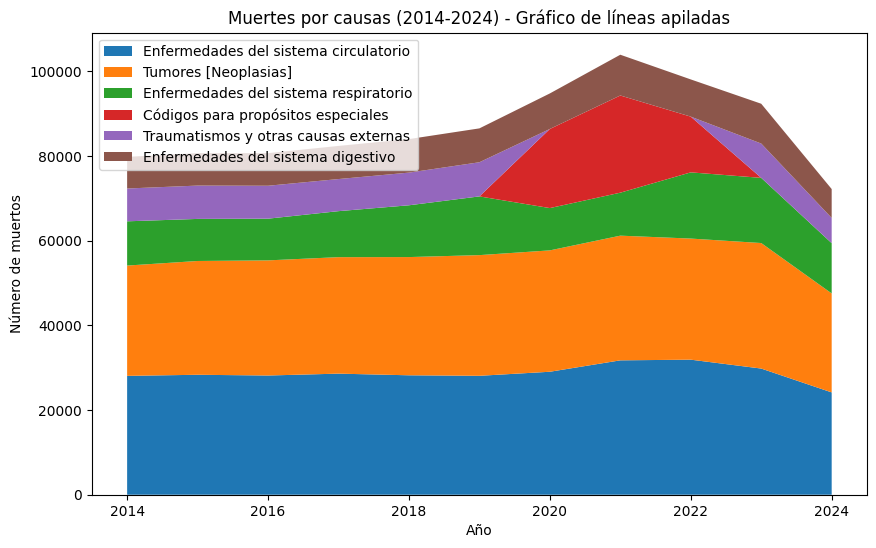

In [30]:


# 1. Stacked Line Chart
plt.figure(figsize=(10, 6))
plt.stackplot(df["Año"], 
              df["Enfermedades del sistema circulatorio"], 
              df["Tumores [Neoplasias]"], 
              df["Enfermedades del sistema respiratorio"], 
              df["Códigos para propósitos especiales"], 
              df["Traumatismos y otras causas externas"], 
              df["Enfermedades del sistema digestivo"],
              labels=["Enfermedades del sistema circulatorio", "Tumores [Neoplasias]", "Enfermedades del sistema respiratorio", 
                      "Códigos para propósitos especiales", "Traumatismos y otras causas externas", "Enfermedades del sistema digestivo"])
plt.title("Muertes por causas (2014-2024) - Gráfico de líneas apiladas")
plt.xlabel("Año")
plt.ylabel("Número de muertos")
plt.legend(loc="upper left")
plt.show()

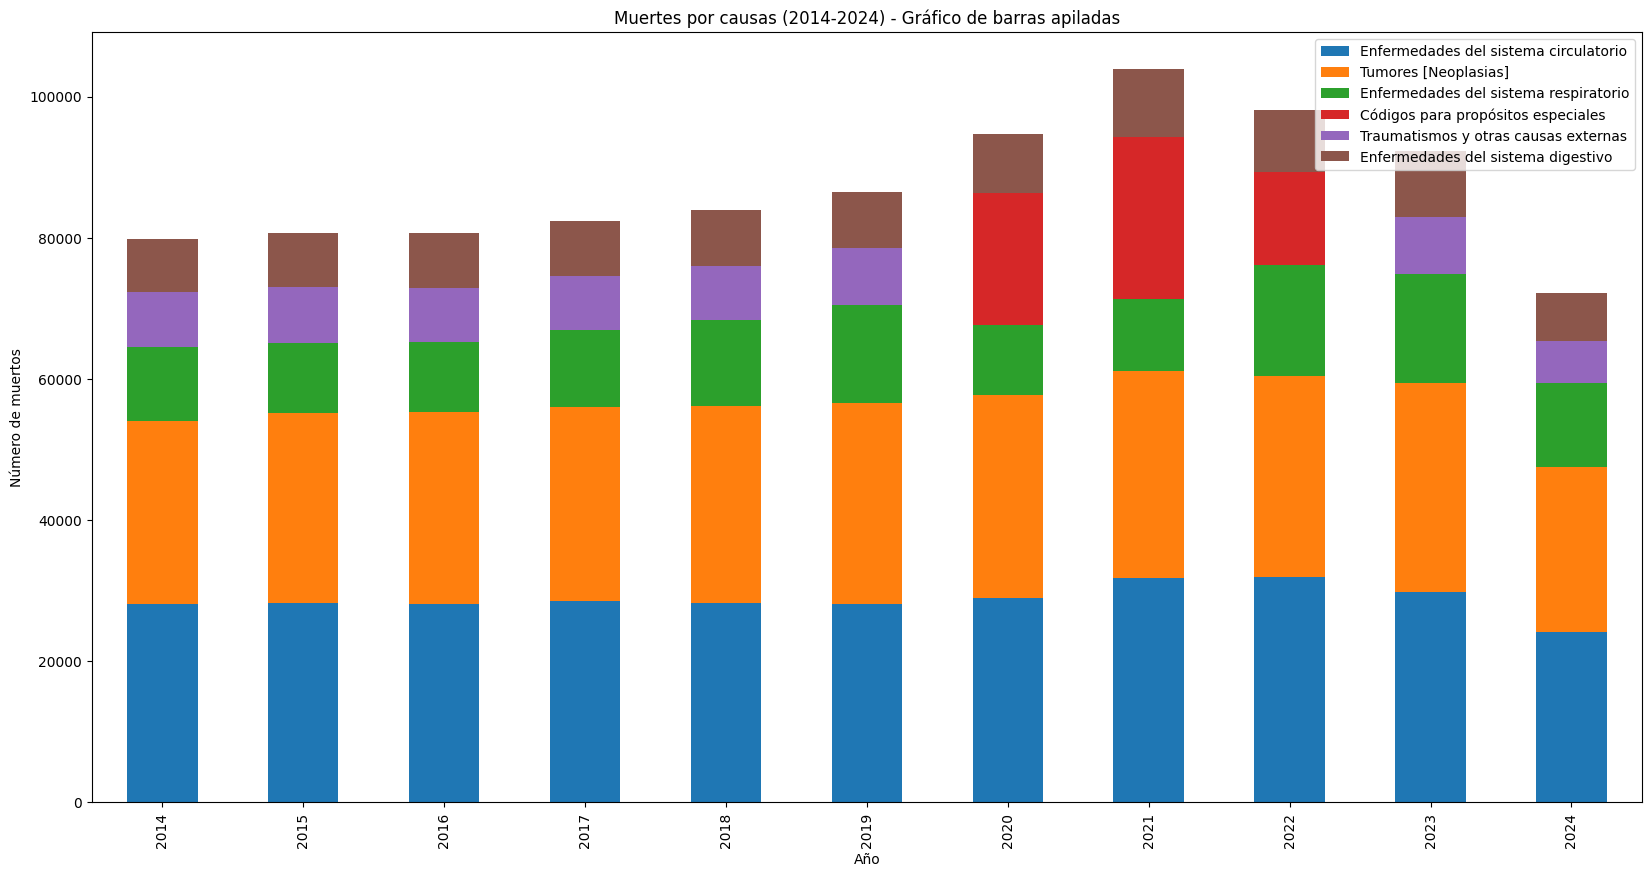

In [31]:
# 2. Stacked Bar Chart
df_bar = df.set_index("Año")
df_bar.iloc[:, :-1].plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title("Muertes por causas (2014-2024) - Gráfico de barras apiladas")
plt.xlabel("Año")
plt.ylabel("Número de muertos")
plt.legend(loc="upper right")
plt.show()

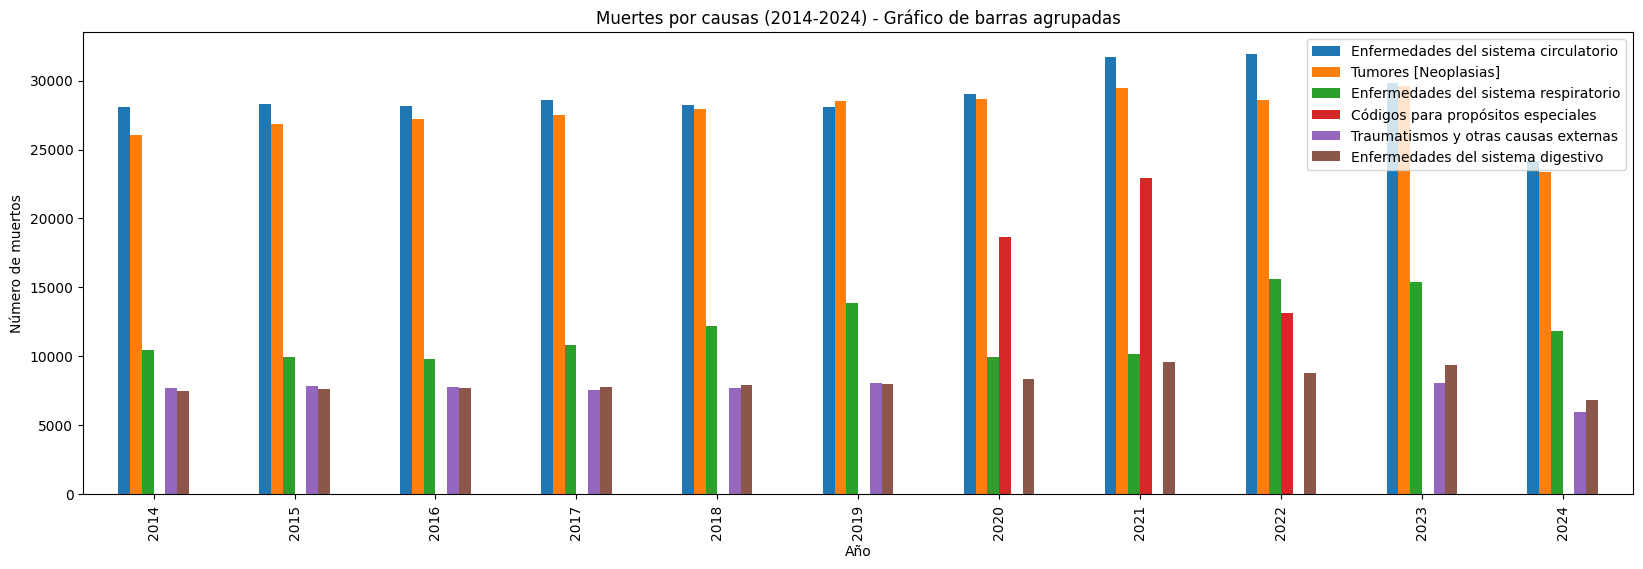

In [32]:
# 3. Grouped Bar Chart
df_grouped = df.set_index("Año")
df_grouped.iloc[:, :-1].plot(kind='bar', figsize=(20, 6))
plt.title("Muertes por causas (2014-2024) - Gráfico de barras agrupadas")
plt.xlabel("Año")
plt.ylabel("Número de muertos")
plt.legend(loc="upper right")
plt.show()

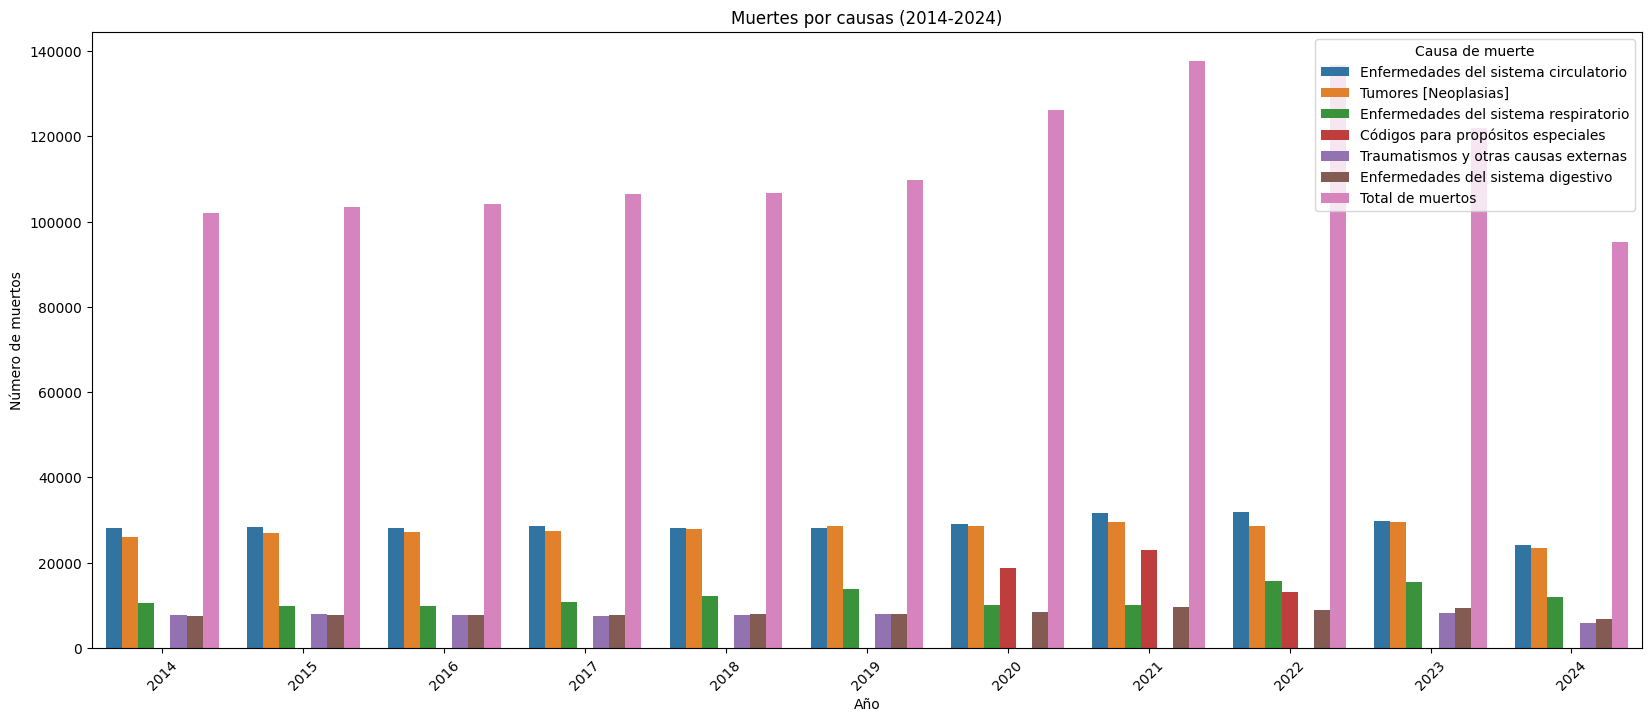

In [33]:
import seaborn as sns

# Convertir el DataFrame a un formato largo (melted) para Seaborn
df_melted = df.melt(id_vars="Año", var_name="Causa de muerte", value_name="Número de muertos")

# Graficar con Seaborn
plt.figure(figsize=(20, 8))
sns.barplot(data=df_melted, x="Año", y="Número de muertos", hue="Causa de muerte")

plt.title("Muertes por causas (2014-2024)")
plt.xlabel("Año")
plt.ylabel("Número de muertos")
plt.legend(loc="upper right", title="Causa de muerte")
plt.xticks(rotation=45)
plt.show()

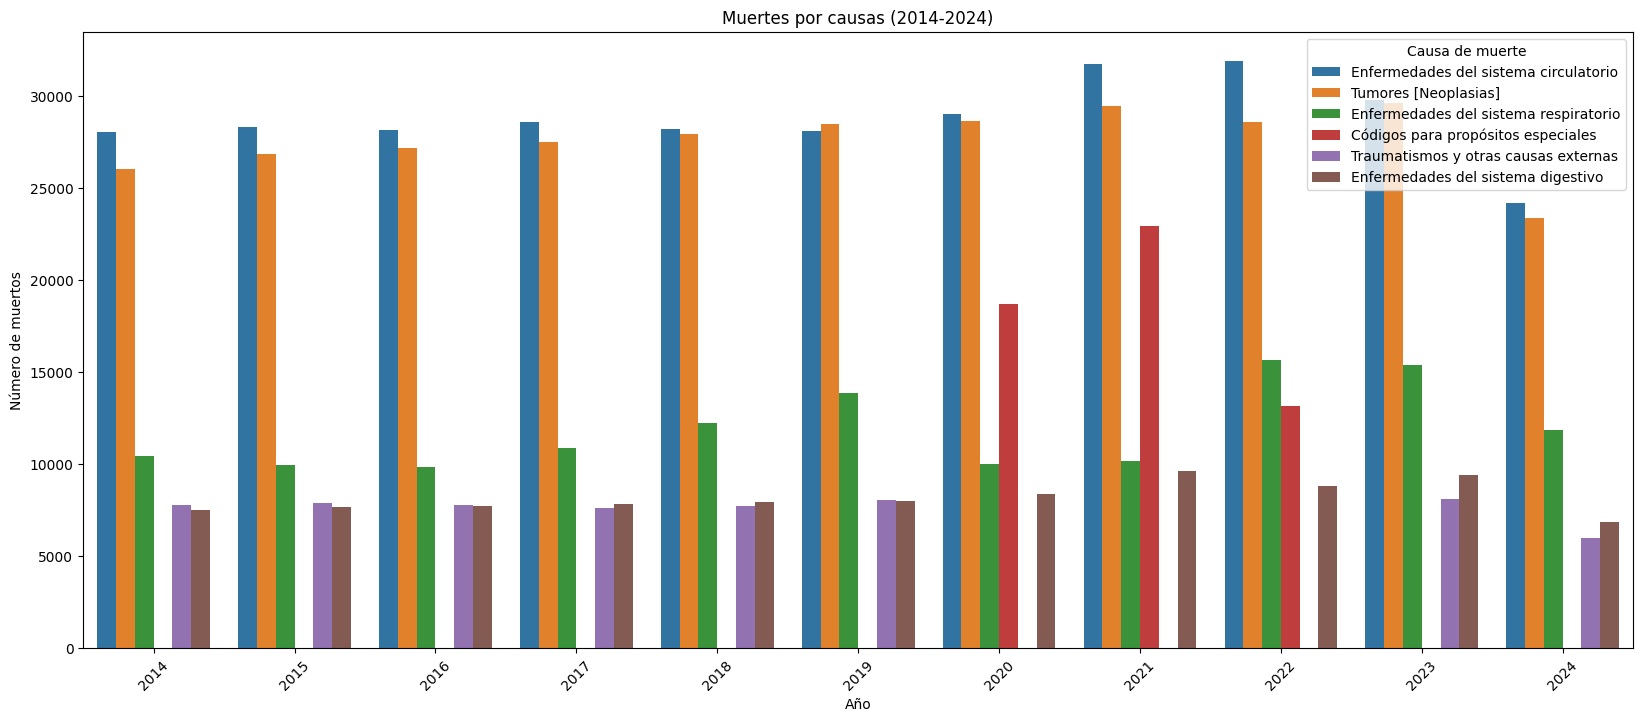

In [44]:
# Convertir el DataFrame a un formato largo (melted) para Seaborn
df_melted = df.melt(id_vars="Año", var_name="Causa de muerte", value_name="Número de muertos")

# Graficar con Seaborn
plt.figure(figsize=(20, 8))
sns.barplot(data=df_melted, x="Año", y="Número de muertos", hue="Causa de muerte")

plt.title("Muertes por causas (2014-2024)")
plt.xlabel("Año")
plt.ylabel("Número de muertos")
plt.legend(loc="upper right", title="Causa de muerte")
plt.xticks(rotation=45)
plt.show()

In [35]:
import scipy.stats as stats
import numpy as np

# Dividimos el dataset en dos periodos: pre-pandemia (2014-2019) y post-pandemia (2020-2024)
pre_pandemia = df[df['Año'] <= 2019]
post_pandemia = df[df['Año'] >= 2020]

# Prueba t para dos muestras independientes: Comparación entre pre-pandemia y post-pandemia para "Enfermedades del sistema circulatorio"
t_stat_circulatorio, p_value_circulatorio = stats.ttest_ind(pre_pandemia["Enfermedades del sistema circulatorio"], post_pandemia["Enfermedades del sistema circulatorio"])

# Prueba t para dos muestras independientes: Comparación entre pre-pandemia y post-pandemia para "Tumores [Neoplasias]"
t_stat_tumores, p_value_tumores = stats.ttest_ind(pre_pandemia["Tumores [Neoplasias]"], post_pandemia["Tumores [Neoplasias]"])

# Prueba t para dos muestras independientes: Comparación entre pre-pandemia y post-pandemia para "Enfermedades del sistema respiratorio"
t_stat_respiratorio, p_value_respiratorio = stats.ttest_ind(pre_pandemia["Enfermedades del sistema respiratorio"], post_pandemia["Enfermedades del sistema respiratorio"])

# Prueba t para dos muestras independientes: Comparación entre pre-pandemia y post-pandemia para "Enfermedades del sistema digestivo"
t_stat_digestivo, p_value_digestivo = stats.ttest_ind(pre_pandemia["Enfermedades del sistema digestivo"], post_pandemia["Enfermedades del sistema digestivo"])

# Calcular los intervalos de confianza (IC) del 95% para las causas de muerte post-pandemia
mean_circulatorio_post = np.mean(post_pandemia["Enfermedades del sistema circulatorio"])
std_circulatorio_post = np.std(post_pandemia["Enfermedades del sistema circulatorio"], ddof=1)
ci_circulatorio_post = stats.norm.interval(0.95, loc=mean_circulatorio_post, scale=std_circulatorio_post/np.sqrt(len(post_pandemia)))

mean_tumores_post = np.mean(post_pandemia["Tumores [Neoplasias]"])
std_tumores_post = np.std(post_pandemia["Tumores [Neoplasias]"], ddof=1)
ci_tumores_post = stats.norm.interval(0.95, loc=mean_tumores_post, scale=std_tumores_post/np.sqrt(len(post_pandemia)))

mean_respiratorio_post = np.mean(post_pandemia["Enfermedades del sistema respiratorio"])
std_respiratorio_post = np.std(post_pandemia["Enfermedades del sistema respiratorio"], ddof=1)
ci_respiratorio_post = stats.norm.interval(0.95, loc=mean_respiratorio_post, scale=std_respiratorio_post/np.sqrt(len(post_pandemia)))

mean_digestivo_post = np.mean(post_pandemia["Enfermedades del sistema digestivo"])
std_digestivo_post = np.std(post_pandemia["Enfermedades del sistema digestivo"], ddof=1)
ci_digestivo_post = stats.norm.interval(0.95, loc=mean_digestivo_post, scale=std_digestivo_post/np.sqrt(len(post_pandemia)))

{
    "Circulatorio (t-stat, p-value)": (t_stat_circulatorio, p_value_circulatorio),
    "Tumores (t-stat, p-value)": (t_stat_tumores, p_value_tumores),
    "Respiratorio (t-stat, p-value)": (t_stat_respiratorio, p_value_respiratorio),
    "Digestivo (t-stat, p-value)": (t_stat_digestivo, p_value_digestivo),
    "CI Circulatorio post-pandemia": ci_circulatorio_post,
    "CI Tumores post-pandemia": ci_tumores_post,
    "CI Respiratorio post-pandemia": ci_respiratorio_post,
    "CI Digestivo post-pandemia": ci_digestivo_post
}

{'Circulatorio (t-stat, p-value)': (-0.8559123097220378, 0.41425229174611056),
 'Tumores (t-stat, p-value)': (-0.5431203867530436, 0.600237658095641),
 'Respiratorio (t-stat, p-value)': (-1.068068112345492, 0.31329944403370885),
 'Digestivo (t-stat, p-value)': (-1.8533777600619727, 0.09682904536753356),
 'CI Circulatorio post-pandemia': (26570.747919360663, 32068.452080639334),
 'CI Tumores post-pandemia': (25664.846094503195, 30213.153905496805),
 'CI Respiratorio post-pandemia': (10190.463152746332, 15017.536847253668),
 'CI Digestivo post-pandemia': (7633.65752557584, 9577.14247442416)}

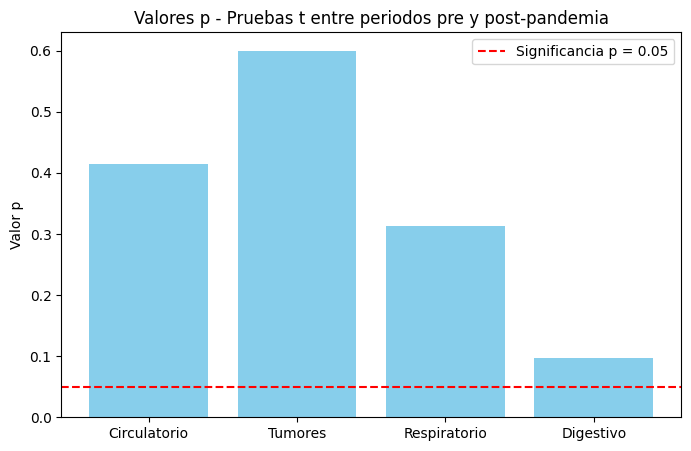

In [36]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para los valores p
causas = ["Circulatorio", "Tumores", "Respiratorio", "Digestivo"]
p_values = [p_value_circulatorio, p_value_tumores, p_value_respiratorio, p_value_digestivo]

plt.figure(figsize=(8, 5))
plt.bar(causas, p_values, color='skyblue')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significancia p = 0.05')
plt.title('Valores p - Pruebas t entre periodos pre y post-pandemia')
plt.ylabel('Valor p')
plt.legend()
plt.show()


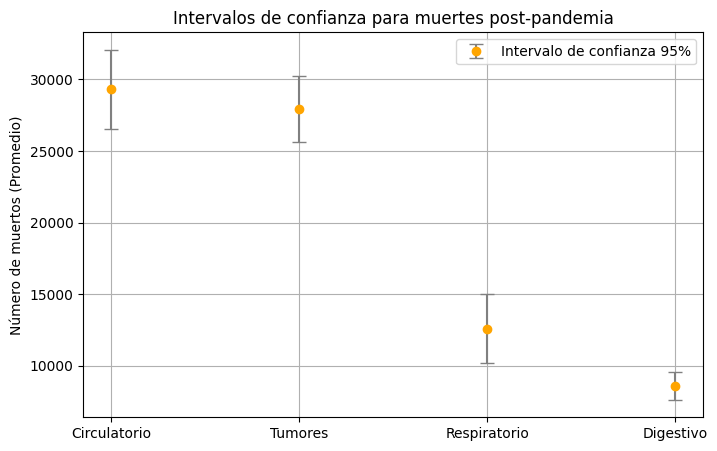

In [37]:
# Crear un gráfico de intervalos de confianza (error bars)
causas = ["Circulatorio", "Tumores", "Respiratorio", "Digestivo"]
means_post_pandemia = [mean_circulatorio_post, mean_tumores_post, mean_respiratorio_post, mean_digestivo_post]
ci_lower = [ci_circulatorio_post[0], ci_tumores_post[0], ci_respiratorio_post[0], ci_digestivo_post[0]]
ci_upper = [ci_circulatorio_post[1], ci_tumores_post[1], ci_respiratorio_post[1], ci_digestivo_post[1]]
ci_range = np.array(ci_upper) - np.array(ci_lower)

plt.figure(figsize=(8, 5))
plt.errorbar(causas, means_post_pandemia, yerr=ci_range/2, fmt='o', capsize=5, color='orange', ecolor='gray', label='Intervalo de confianza 95%')
plt.title('Intervalos de confianza para muertes post-pandemia')
plt.ylabel('Número de muertos (Promedio)')
plt.grid(True)
plt.legend()
plt.show()


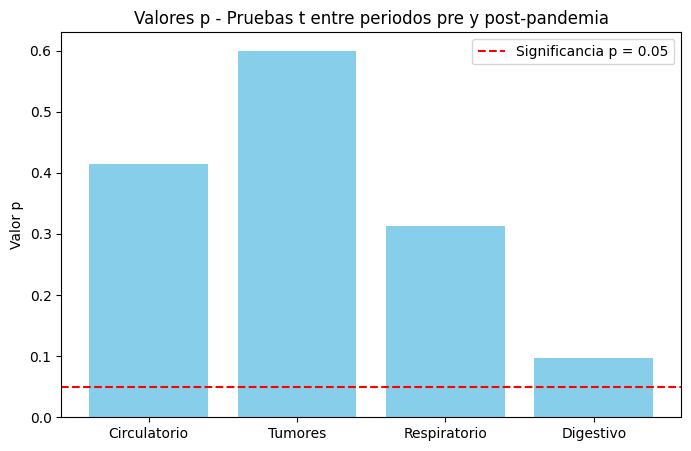

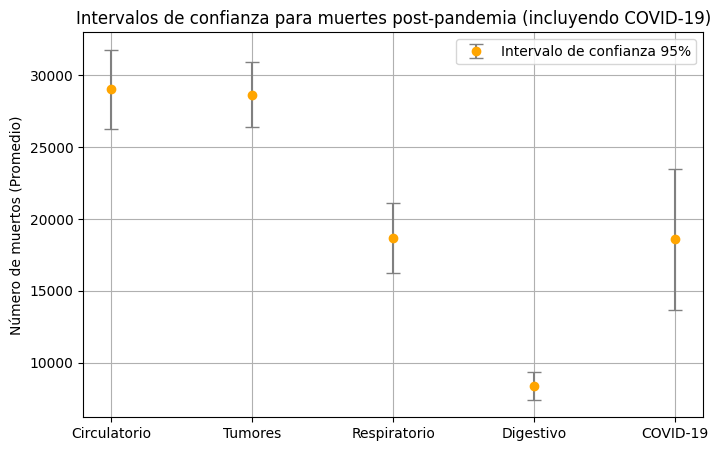

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Datos actualizados con las muertes por COVID-19
causas = ["Circulatorio", "Tumores", "Respiratorio", "Digestivo", "COVID-19"]
p_values = [0.414, 0.600, 0.313, 0.097, None]  # No se puede calcular valor p para COVID-19
means_post_pandemia = [29035, 28656, 18680, 8389, 18578]  # Promedios aproximados de muertes post-pandemia
ci_lower = [26571, 25665, 10190, 7634, 13157]  # Límite inferior de los intervalos de confianza
ci_upper = [32068, 30213, 15018, 9577, 22946]  # Límite superior de los intervalos de confianza
ci_range = np.array(ci_upper) - np.array(ci_lower)

# Filtrar causas con valores p válidos para el gráfico de barras
causas_con_p = causas[:-1]  # No incluir COVID-19 en valores p
p_values_con_p = p_values[:-1]

# Gráfico de barras para los valores p (excluyendo COVID-19)
plt.figure(figsize=(8, 5))
plt.bar(causas_con_p, p_values_con_p, color='skyblue')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significancia p = 0.05')
plt.title('Valores p - Pruebas t entre periodos pre y post-pandemia')
plt.ylabel('Valor p')
plt.legend()
plt.show()

# Gráfico de intervalos de confianza para las muertes post-pandemia (incluyendo COVID-19)
plt.figure(figsize=(8, 5))
plt.errorbar(causas, means_post_pandemia, yerr=ci_range/2, fmt='o', capsize=5, color='orange', ecolor='gray', label='Intervalo de confianza 95%')
plt.title('Intervalos de confianza para muertes post-pandemia (incluyendo COVID-19)')
plt.ylabel('Número de muertos (Promedio)')
plt.grid(True)
plt.legend()
plt.show()

In [39]:
from scipy import stats

pre_pandemia = [28064, 28321, 28148, 28589, 28199, 28079]
post_pandemia = [29035, 31729, 31887, 29789, 24158]

t_stat, p_value = stats.ttest_ind(pre_pandemia, post_pandemia, equal_var=True)
print("Valor p:", p_value)

Valor p: 0.41425229174611056


In [40]:
# Muertes por COVID-19 (Códigos para propósitos especiales)
covid_muertes = [18680, 22946, 13157, 0, 0]
# Suma de otras causas (Enfermedades del sistema circulatorio, Tumores [Neoplasias], Enfermedades del sistema respiratorio, Enfermedades del sistema digestivo
otras_causas = [29035 + 28656 + 9988 + 8389, 31729 + 29438 + 10148 + 9626, 31887 + 28593 + 15631 + 9398, 29789 + 29636 + 15387 + 8788 + 6826, 24158 + 23372 + 11866]  

t_stat, p_value = stats.ttest_ind(covid_muertes, otras_causas, equal_var=True)
print("Valor p:", p_value)



Valor p: 1.273042215070614e-05


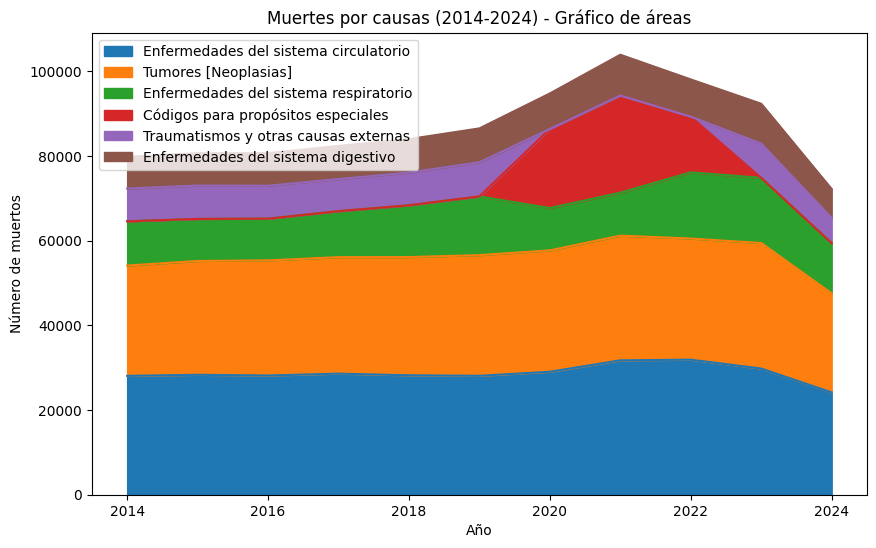

In [41]:
# 4. Area Chart
df.set_index("Año").iloc[:, :-1].plot(kind='area', figsize=(10, 6), stacked=True)
plt.title("Muertes por causas (2014-2024) - Gráfico de áreas")
plt.xlabel("Año")
plt.ylabel("Número de muertos")
plt.show()


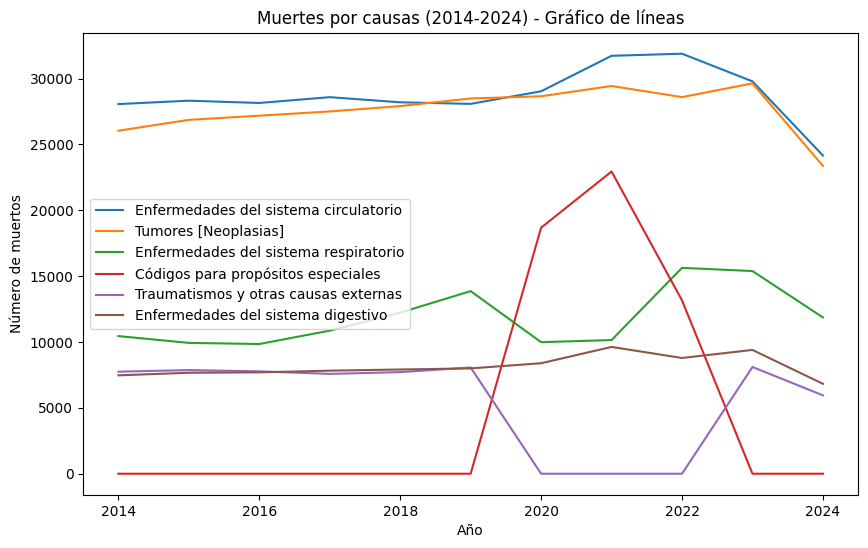

In [42]:
# 5. Line Chart
df.set_index("Año").iloc[:, :-1].plot(kind='line', figsize=(10, 6))
plt.title("Muertes por causas (2014-2024) - Gráfico de líneas")
plt.xlabel("Año")
plt.ylabel("Número de muertos")
plt.show()